# USA not likely to medal

## Scaling no improvement - but leaving nation might help


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('../../Combine_Data/men/iaa_encoded.csv')
iaaolymp = pd.read_csv('../../Combine_Data/men/iaa2024.csv')
olymp = pd.read_csv('../../Combine_Data/men/encoded_m_olympics_iaa.csv')
iaanames = pd.read_csv('../../Combine_Data/men/encoded_m_olympics_iaanames.csv')

In [3]:
df=df.drop(columns=['year'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         410 non-null    float64
 1   FX           458 non-null    float64
 2   PH           458 non-null    float64
 3   SR           454 non-null    float64
 4   VT           457 non-null    float64
 5   PB           442 non-null    float64
 6   HB           452 non-null    float64
 7   AA           506 non-null    float64
 8   medal        512 non-null    int64  
 9   Name         512 non-null    int64  
 10  Nation       512 non-null    int64  
 11  round_final  512 non-null    bool   
 12  round_qual   512 non-null    bool   
dtypes: bool(2), float64(8), int64(3)
memory usage: 45.1 KB


In [5]:
df = df.dropna(subset=['Rank'])

In [6]:
df = df.dropna()

Classifier: Random Forest
Accuracy: 0.9901


Classifier: AdaBoost
Accuracy: 0.9901

In [7]:
# Assuming you already have your DataFrame 'df' and the target variable is 'medal'
y = df['medal']
X = df.drop(columns=['medal'])


In [8]:
X = X.drop(columns=['Nation'])

In [9]:
olymp=olymp.drop(columns=['year', 'Nation'])

In [10]:
olymp = olymp.dropna()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)


In [12]:
X_train.head()

,Rank,FX,PH,SR,VT,PB,HB,AA,Name,round_final,round_qual
72,49.0,12.700,12.4,13.900,12.866,13.466,12.000,77.332,25,False,True
477,7.0,13.900,12.3,14.150,13.700,13.700,13.950,81.700,71,True,False
327,115.0,12.366,12.8,11.466,14.000,13.358,10.566,74.556,126,False,True
316,104.0,12.066,12.6,12.766,13.933,13.350,10.366,75.081,136,False,True
8,9.0,13.700,13.8,14.341,14.733,13.766,12.800,83.140,42,True,False


In [13]:
olymp.head()


,Rank,FX,PH,SR,VT,PB,HB,AA,Name,round_final,round_qual
0,1.0,14.733,15.075,13.333,15.066,15.200,14.633,88.040,141,False,True
1,2.0,14.133,14.666,14.866,14.766,15.300,14.166,87.897,411,False,True
2,3.0,14.066,12.666,14.533,14.966,14.366,13.833,84.430,7,False,True
3,4.0,13.200,13.466,13.933,14.233,15.200,13.866,83.898,342,False,True
4,5.0,14.333,13.766,12.500,14.066,14.700,14.200,83.565,159,False,True


In [14]:

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
    }

# Print the results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classifier: Random Forest
Accuracy: 0.9901
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       1.00      0.67      0.80         3

    accuracy                           0.99       101
   macro avg       0.99      0.83      0.90       101
weighted avg       0.99      0.99      0.99       101

Confusion Matrix:
[[98  0]
 [ 1  2]]

Classifier: AdaBoost
Accuracy: 0.9703
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        98
           1       0.50      0.33      0.40         3

    accuracy                           0.97       101
   macro avg       0.74      0.66      0.69       101
weighted avg       0.97      0.97      0.97       101

Confusion Matrix:
[[97  1]
 [ 2  1]]

Classifier: SVM
Accuracy: 0.9703
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.0

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-

Classifier: Random Forest
Accuracy: 1.0000


Classifier: AdaBoost
Accuracy: 0.9901

In [15]:
# Initialize the AdaBoost classifier
# CHANGING LEARNIN RATE TO 0.31 RESULTS IN 1.000 
clf = AdaBoostClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("AdaBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

AdaBoost Classifier
Accuracy: 0.9703
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        98
           1       0.50      0.33      0.40         3

    accuracy                           0.97       101
   macro avg       0.74      0.66      0.69       101
weighted avg       0.97      0.97      0.97       101

Confusion Matrix:
[[97  1]
 [ 2  1]]


# Feature Importance

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier


# Initialize the AdaBoost classifier
clf = AdaBoostClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = clf.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Rank: 0.0000
FX: 0.0200
PH: 0.0000
SR: 0.0200
VT: 0.1600
PB: 0.3000
HB: 0.1600
AA: 0.1600
Name: 0.1800
round_final: 0.0000
round_qual: 0.0000


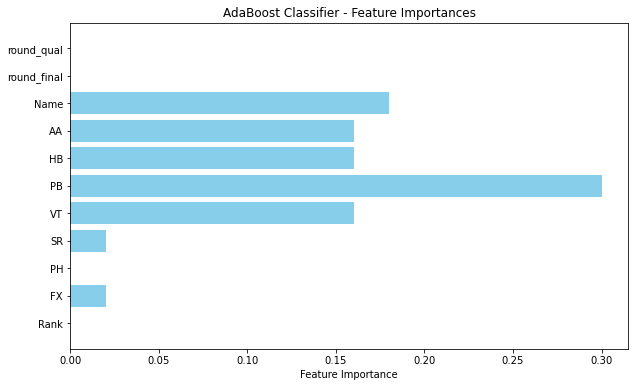

In [17]:
import matplotlib.pyplot as plt

feature_importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier - Feature Importances')
plt.show()


In [54]:
y_pred = clf.predict(olymp)


In [55]:
ypreds  = pd.Series(y_pred)
olymp['ypred']=ypreds

In [56]:
olymp['ypred'].value_counts()

ypred
0.0    412
1.0      4
Name: count, dtype: int64

In [57]:
filtered_df = olymp[olymp['ypred'] == 1]

In [58]:
filtered_df['Name'].unique()

array([411, 366, 400, 395])

In [59]:
name_encoded_values = [411, 366, 400, 395]

# Filter the DataFrame to get the corresponding "Name" values
result = iaanames.loc[iaanames['Name_encoded'].isin(name_encoded_values), 'Athlete']


In [60]:
result.unique()

array(['zhang boheng', 'thomas grasso', 'yonekura hidenobu',
       'yang hakseon south'], dtype=object)